# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model

# Import the data

In [3]:
(X_train,_),(X_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
X_train[0][5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
         0,   0], dtype=uint8)

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
X_train = X_train/255.0
X_test = X_test/255.0

In [13]:
X_train[0][5]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01176471, 0.07058824, 0.07058824,
       0.07058824, 0.49411765, 0.53333333, 0.68627451, 0.10196078,
       0.65098039, 1.        , 0.96862745, 0.49803922, 0.        ,
       0.        , 0.        , 0.        ])

In [14]:
X_train = X_train.reshape(len(X_train),28*28)
X_test = X_test.reshape(len(X_test),28*28)

In [16]:
X_train.shape

(60000, 784)

Text(0.5, 0.98, 'Train Data')

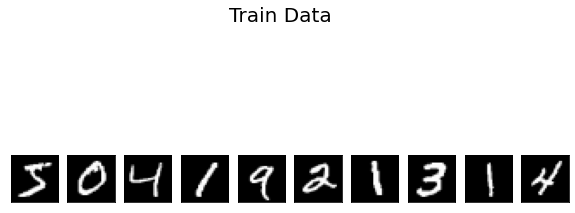

In [23]:
plt.figure(figsize=(10,5))
for i in range(10):
  ax = plt.subplot(1,10,i+1)
  plt.imshow(X_train[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.suptitle('Train Data', fontsize=20)

In [24]:
def show_visual(data, title, n=10, height=28, width=28):
  plt.figure(figsize=(10,5))
  for i in range(n):
    ax = plt.subplot(1,n,i+1)
    plt.imshow(data[i].reshape(height,width))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.suptitle(title, fontsize=20)

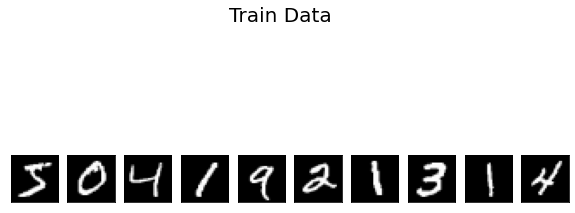

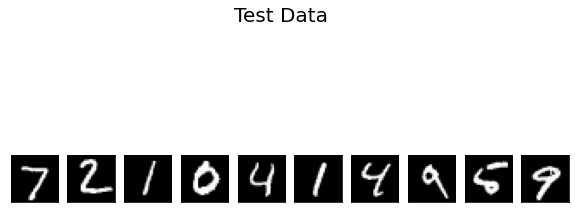

In [25]:
show_visual(X_train,title='Train Data')
show_visual(X_test,title='Test Data')

In [26]:
input_dim, output_dim = 784, 784
encode_dim = 100
hidden_dim = 256

In [27]:
# Encoder
input_layer = Input(shape=input_dim, name="INPUT")
hidden_layer_1 = Dense(hidden_dim, activation='relu', name='HIDDEN_1')(input_layer)

In [28]:
# Bottle Neck
bottle_neck = Dense(encode_dim, activation='relu', name='BOTTLE_NECK')(hidden_layer_1)

In [29]:
# Decoder
hidden_layer_2 = Dense(hidden_dim, activation='relu', name='HIDDEN_2')(bottle_neck)
output_layer = Dense(output_dim, activation='sigmoid', name='OUTPUT')(hidden_layer_2)

In [30]:
model = Model(input_layer, output_layer)

In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [32]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
HIDDEN_1 (Dense)             (None, 256)               200960    
_________________________________________________________________
BOTTLE_NECK (Dense)          (None, 100)               25700     
_________________________________________________________________
HIDDEN_2 (Dense)             (None, 256)               25856     
_________________________________________________________________
OUTPUT (Dense)               (None, 784)               201488    
Total params: 454,004
Trainable params: 454,004
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit(X_train,X_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.1118
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0800
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0754
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0731
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0719
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0710
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0703
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0698
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0694
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0691


In [34]:
decoded_data = model.predict(X_test)

In [38]:
get_encoded_data = Model(inputs=model.input,
                         outputs = model.get_layer('BOTTLE_NECK').output)

In [39]:
encoded_data = get_encoded_data.predict(X_test)

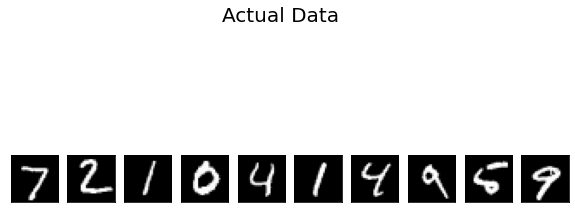

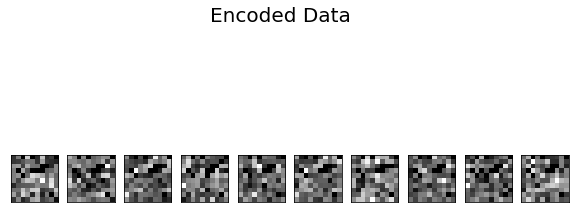

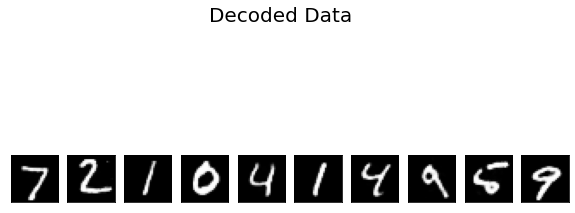

In [40]:
show_visual(X_test, title="Actual Data")
show_visual(encoded_data, title="Encoded Data", height=10, width=10)
show_visual(decoded_data, title="Decoded Data")